# PCA vs NMF

## Imports

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

## Plotting Utility

In [16]:
def plot_faces(rows, cols, figsize, processed_data, save_at, title):
    fig, axs = plt.subplots(
        nrows=rows,
        ncols=cols,
        figsize=figsize,
        constrained_layout=True
    )
    for ax, face in zip(axs.flat, processed_data):
        vmax = max(face.max(), -face.min())
        image = ax.imshow(
            face,
            cmap=plt.cm.gray,
            vmin=-vmax,
            vmax=vmax
        )
        ax.axis(False)
    fig.suptitle(f"{title}")
    fig.colorbar(image, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    fig.savefig(f"./figures/{save_at}.png")

## Preprocessing

In [17]:
face_dataset = fetch_olivetti_faces()
face_data = face_dataset.data
n_components = 49

## Performing PCA

In [18]:
pca = PCA(n_components=n_components)
pca.fit(face_data)
eigenfaces = pca.components_.reshape((n_components), 64, 64)

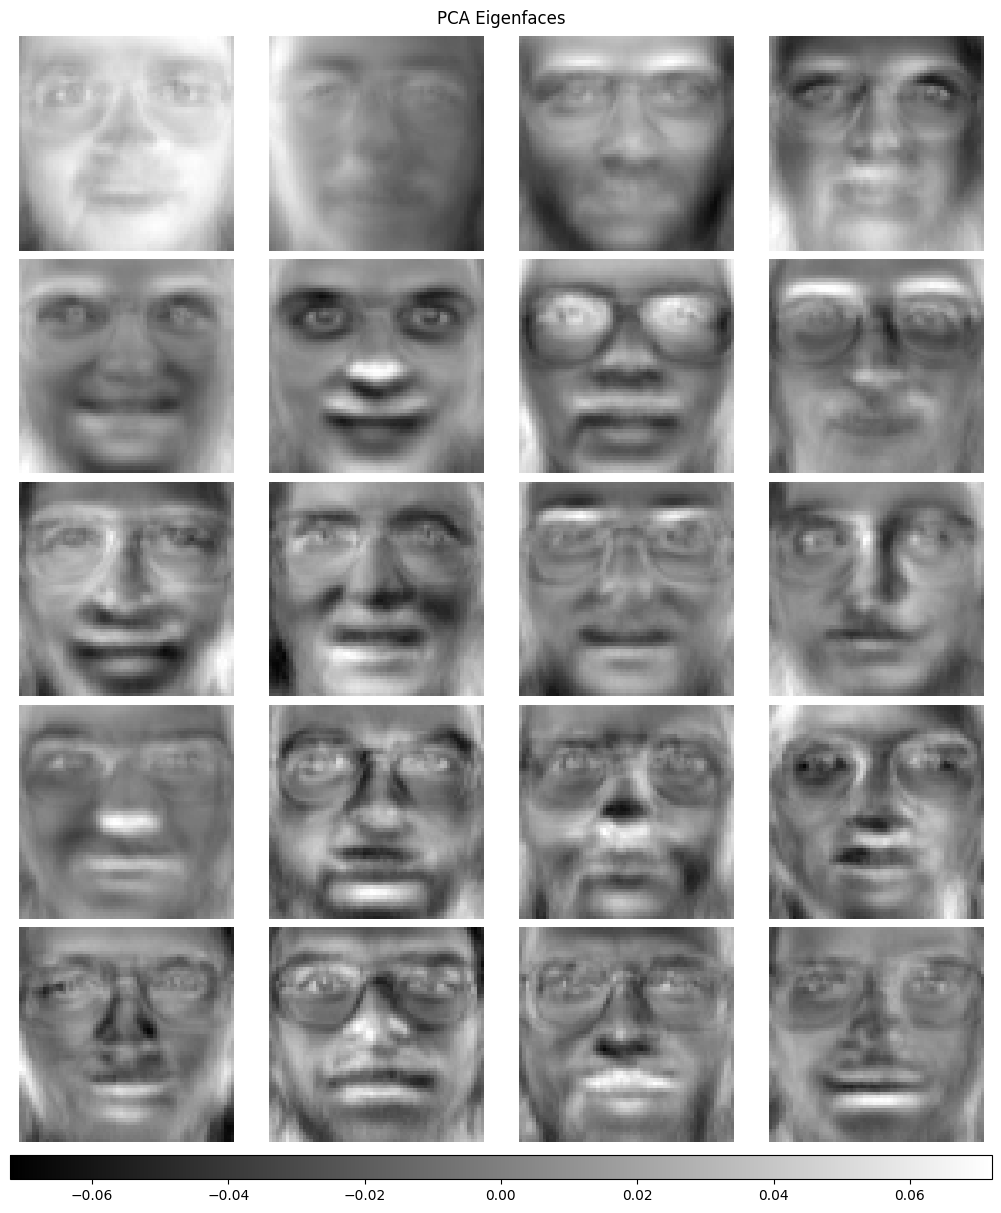

In [19]:
plot_faces(5, 4, (10, 12), eigenfaces, "eigenfaces", "PCA Eigenfaces")

## Non-Negative Matrix Factorization

In [70]:
nmf = NMF(n_components=n_components, max_iter=10000, init="nndsvd", l1_ratio=.85)
nmf.fit(face_data)
nonnegative_components = nmf.components_.reshape((n_components), 64, 64)

/usr/local/lib/python3.13/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 10000 reached. Increase it to improve convergence.
  warnings.warn(


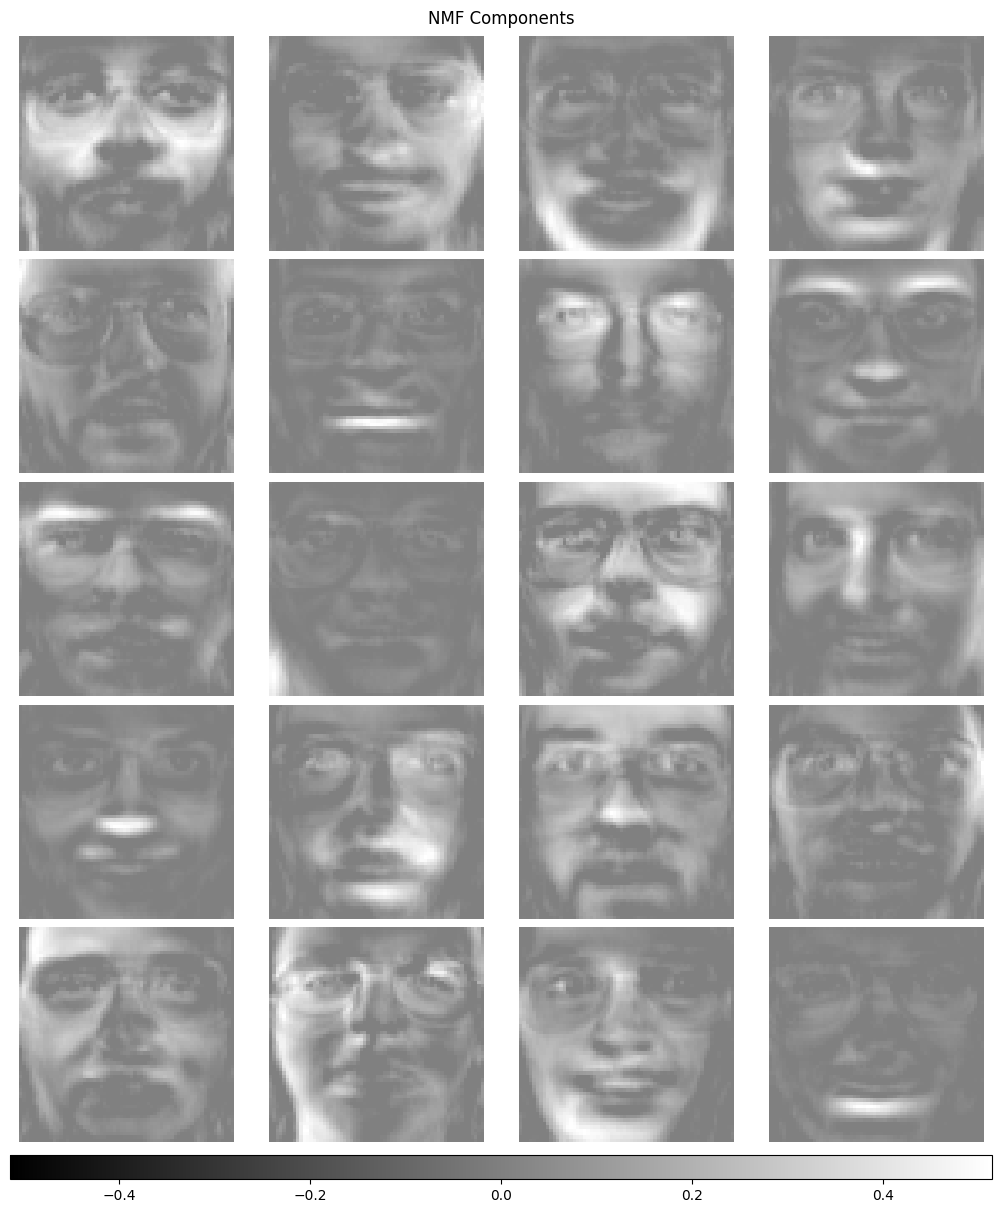

In [71]:
plot_faces(5, 4, (10, 12), nonnegative_components, "nnc", "NMF Components")